# Keşifsel Veri Analizi

## Özellik Mühendisliği - 1

Bu ödevde Öğrencilerin Sınav Performansı'na ait verileri kullanacaksınız. 

Kaynak: https://www.kaggle.com/spscientist/students-performance-in-exams/home

### Q1

Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

---
- Histogramlar incelenerek baslanabilir.

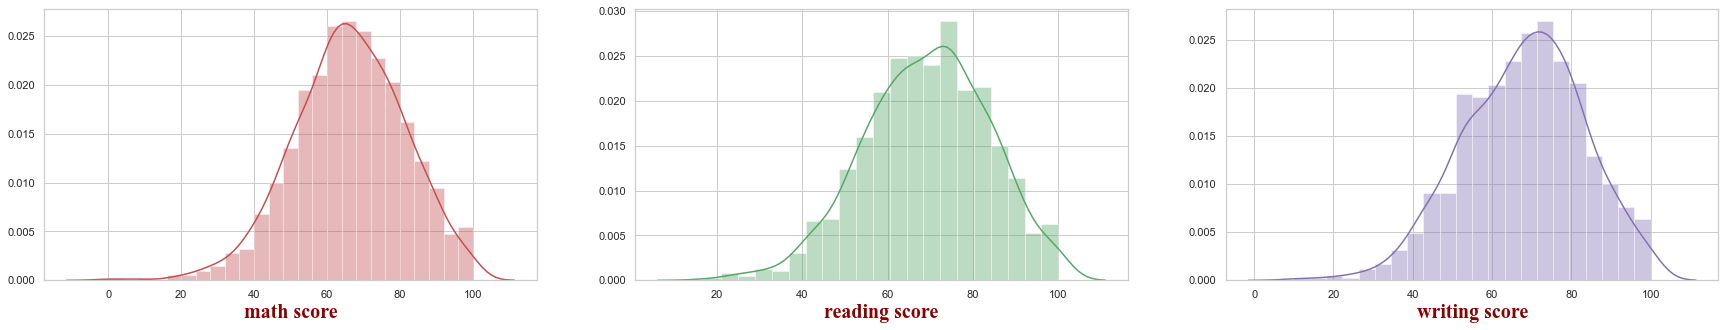

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
#from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
# to display more (100) columns in pandas display() method
pd.set_option('display.max_columns', 100)
# custom font defs
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 20}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 20 }

df = pd.read_csv('StudentsPerformance.csv')


columns = ['math score', 'reading score', 'writing score']


fig, ax = plt.subplots(1, 3, figsize=(30, 5))
colors = ['r', 'g', 'm']
for i, column in enumerate(columns):
    sns.distplot(df[column], kde=True, color=colors[i], ax=ax[i], )
    ax[i].set_xlabel(column, fontdict=axis_font);
plt.show()

- Sinav notlarinin dagilimi normal dagilima benzer ancak tam olarak normal dagilim degildir.

- Asagidaki jarque-bera (JB) testinde de p value 0.05 ten kucuk ciktigindan normal dagilim olmadigi anlasilmaktadir. 
    - $JB(PValue>0.05)=$ Normal Distribution, $JB(PValue<0.05)=$ Non-Normal Distribution

In [123]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["math score", "reading score", "writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(df[ozellik])
    norm_stats = normaltest(df[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,15.91226,0.00035,15.40896,0.00045
1,reading score,11.38330,0.00337,11.11741,0.00385
2,writing score,13.98509,0.00092,13.60645,0.00111


- Verileri normallestirmek icin scklearn kutuphanesinin normalize metodu kullanilabilir.

In [124]:
from sklearn.preprocessing import normalize

df["norm_math_score"] = normalize(np.array(df["math score"]).reshape(1,-1)).reshape(-1,1)
df["norm_reading_score"] = normalize(np.array(df["reading score"]).reshape(1,-1)).reshape(-1,1)
df["norm_writing_score"] = normalize(np.array(df["writing score"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["math score","norm_math_score","reading score","norm_reading_score",
                    "writing score","norm_writing_score"]


print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

Minimum Değer
-----------------
math score            0.00000
norm_math_score       0.00000
reading score        17.00000
norm_reading_score    0.00760
writing score        10.00000
norm_writing_score    0.00454
dtype: float64

Maksimum Değer
-----------------
math score           100.00000
norm_math_score        0.04664
reading score        100.00000
norm_reading_score     0.04473
writing score        100.00000
norm_writing_score     0.04535
dtype: float64


- Normallestirdigimiz verilerin histogrami incelenip JB testinden gecirilebilir.

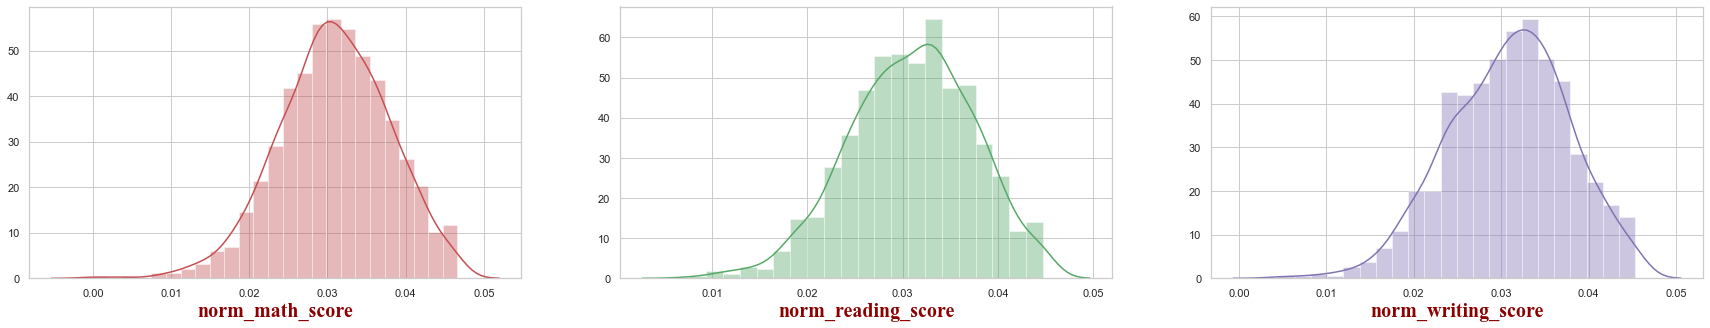

In [125]:
columns = ['norm_math_score', 'norm_reading_score', 'norm_writing_score']


f, axes = plt.subplots(1, 3, figsize=(30, 5))
colors = ['r', 'g', 'm']
for i, column in enumerate(columns):
    sns.distplot(df[column], kde=True, color=colors[i], ax=axes[i])  
    axes[i].set_xlabel(column, fontdict=axis_font)
plt.show()

In [126]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ['norm_math_score', 'norm_reading_score', 'norm_writing_score']
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(df[ozellik])
    norm_stats = normaltest(df[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_math_score,15.91226,0.00035,15.40896,0.00045
1,norm_reading_score,11.38330,0.00337,11.11741,0.00385
2,norm_writing_score,13.98509,0.00092,13.60645,0.00111


- ***Normallestirilen veriler hala testten gecemedi, bunun nedeni asiri degerlerin giderilmemesi olabilir mi? [Outliers_Q1](#Outliers_Q1) bolumunde bu konuya deginildi***

### Q2

Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

---
- Jacque-bera testinden normal dagilimda olmadigi anlasiliyor.

In [127]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

df['score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
ozellik = 'score'

jb_stats = jarque_bera(df[ozellik])
norm_stats = normaltest(df[ozellik])
dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,score,15.45339,0.00044,15.18672,0.00050


- Scikit-learn normalize metodu ile normallestirilebilir.

In [128]:
from sklearn.preprocessing import normalize

df["norm_score"] = normalize(np.array(df["score"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["score","norm_score"]


print('Minimum Değer\n-----------------',)
print(df[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(df[normal_ozellikler].max())

Minimum Değer
-----------------
score        9.00000
norm_score   0.00411
dtype: float64

Maksimum Değer
-----------------
score        100.00000
norm_score     0.04566
dtype: float64


- Tekrar JB testi uygulanir.

In [129]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
ozellik = 'norm_score'

jb_stats = jarque_bera(df[ozellik])
norm_stats = normaltest(df[ozellik])
dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_score,15.45339,0.00044,15.18672,0.00050


- ***Normallestirilen veriler hala testten gecemedi, bunun nedeni asiri degerlerin giderilmemesi olabilir mi? [Outliers-Q2](#Outliers-Q2) bolumunde bu konuya deginildi***

### Q3

Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

---
***Kategorik-Surekli degisken ciftlerinin analizi***
- Cubuk grafigi ile gorsellestirilir.
    - Butun degiskenler hedef degiskenle iliskili gorunuyor. Veri kumesinde butun degiskenleri tutmak uygun olabilir.

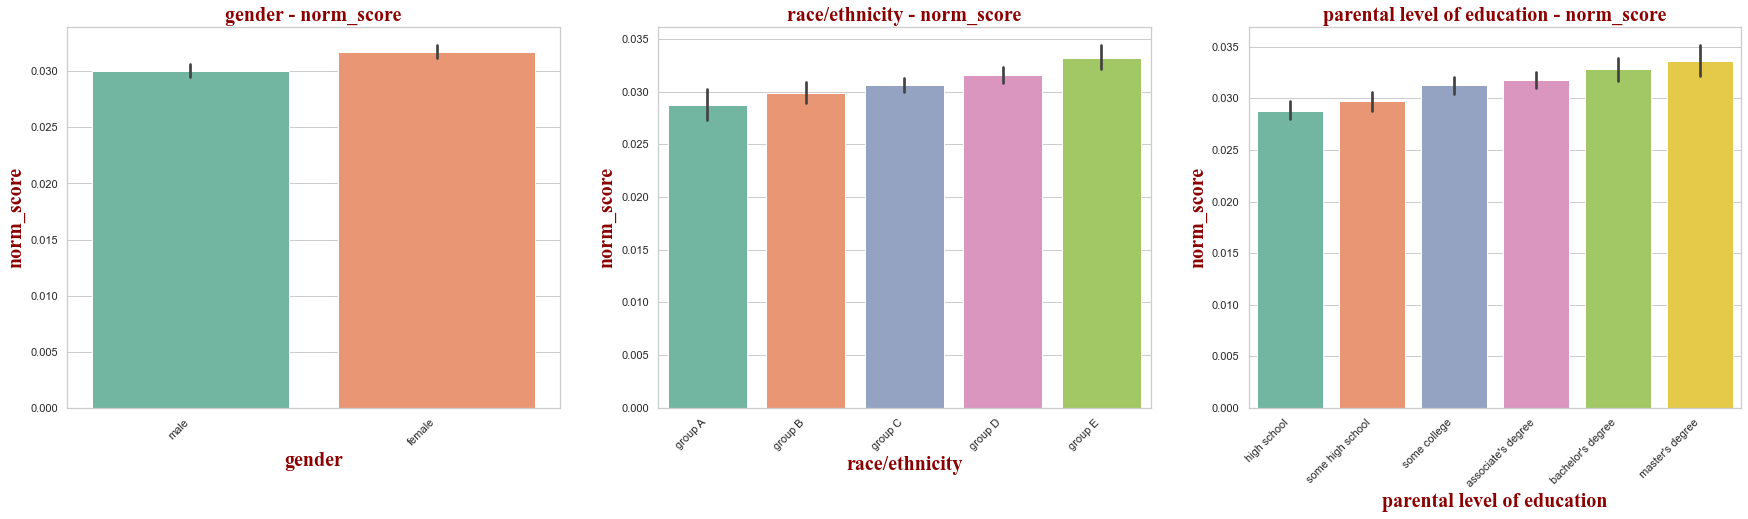

In [130]:
i = 1
column = 'norm_score'
categories = ['gender', 'race/ethnicity', 'parental level of education'] 
plt.figure(figsize=(30,7))

for category in categories :    
    result = df.groupby([category])[column].aggregate(np.mean).reset_index().sort_values(column)
    plt.subplot(1,3,i)
    sns.barplot(df[category], df[column], palette="Set2", order = result[category])
    plt.title(category + ' - ' + column, fontdict = title_font)
    plt.xlabel(category, fontdict=axis_font)
    plt.ylabel(column, fontdict=axis_font)
    plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
    i += 1
    
plt.show()


### Outliers_Q1

Aykiri veriler temizlendikten sonra da normallestirilen veriler testten gecebilecek mi? Incelenmeli.


---
- Boxplot ile kutu grafigi

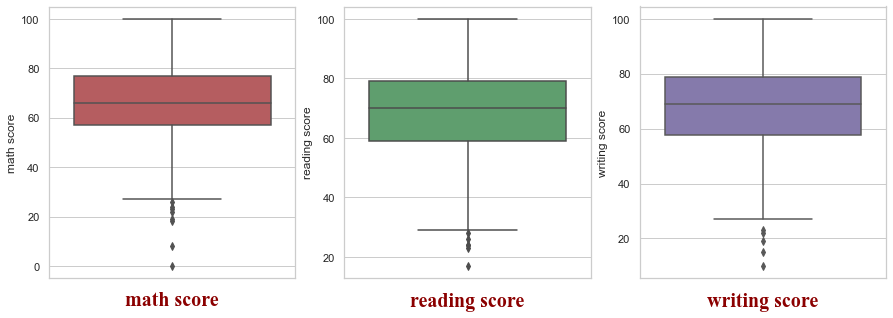

In [131]:
dfout = pd.read_csv('StudentsPerformance.csv')

columns = ['math score', 'reading score', 'writing score']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
colors = ['r', 'g', 'm']
for i, column in enumerate(columns):
    sns.boxplot(y=dfout[column], color=colors[i], ax=ax[i] )
    ax[i].set_xlabel(column, fontdict=axis_font);
plt.show()

- Kutu grafiginde aykiri degerler kucuk degerler tarafinda goruldugunden winsorize metodu tek yonlu calistirilabilir.
- Once yuzde 95 lik dilim (soldan 0.05 winsorize) kullanildi ancak cok fazla veri kaybi oldu.
- Deneme yanilma ile:
    - matematik notlari icin 0.008
    - okuma notlari icin 0.0065
    - yazma notlari icin 0.005 winsorize parametrelerini tespit edildi.

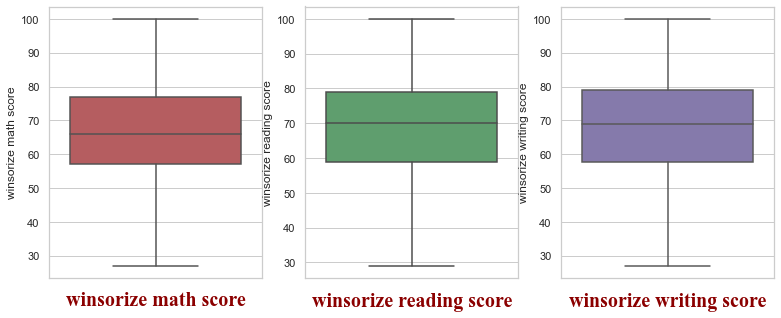

In [132]:
from scipy.stats.mstats import winsorize

columns = ['math score', 'reading score', 'writing score']
wins = [0.008,0.0065,0.005]

for i,column in enumerate(columns):
    dfout['winsorize '+column] = winsorize(dfout[column], (wins[i], 0))
    
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
colors = ['r', 'g', 'm']
for i, column in enumerate(columns):
    sns.boxplot(y=dfout['winsorize '+column], color=colors[i], ax=ax[i] )
    ax[i].set_xlabel('winsorize '+column, fontdict=axis_font);
plt.show()


- JB testi normalize etmeden once uygulanabilir.

In [133]:

ozellikler = ["winsorize math score", "winsorize reading score", "winsorize writing score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(dfout[ozellik])
    norm_stats = normaltest(dfout[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,winsorize math score,5.71205,0.05750,5.95534,0.05091
1,winsorize reading score,9.76094,0.00759,10.10159,0.00640
2,winsorize writing score,11.64095,0.00297,12.66339,0.00178


- Matemetik notlari, sadece aykiri degerlerden arindirilarak normalize edilebildi. (p degeri > 0.05)
- Diger notlar simdi normalize edilip JB testine tabi tutulmali.

In [134]:
from sklearn.preprocessing import normalize

# winsorized math scores are already normally distributed
#dfout["norm_math_score"] = dfout["winsorize math score"]
dfout["norm_math_score"] = normalize(np.array(dfout["winsorize math score"]).reshape(1,-1)).reshape(-1,1)
# normalize other scores
dfout["norm_reading_score"] = normalize(np.array(dfout["winsorize reading score"]).reshape(1,-1)).reshape(-1,1)
dfout["norm_writing_score"] = normalize(np.array(dfout["winsorize writing score"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["math score","norm_math_score","reading score","norm_reading_score",
                    "writing score","norm_writing_score"]


print('Minimum Değer\n-----------------',)
print(dfout[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(dfout[normal_ozellikler].max())


Minimum Değer
-----------------
math score            0.00000
norm_math_score       0.01259
reading score        17.00000
norm_reading_score    0.01297
writing score        10.00000
norm_writing_score    0.01224
dtype: float64

Maksimum Değer
-----------------
math score           100.00000
norm_math_score        0.04662
reading score        100.00000
norm_reading_score     0.04473
writing score        100.00000
norm_writing_score     0.04534
dtype: float64


In [135]:
ozellikler = ["norm_math_score", "norm_reading_score", "norm_writing_score"]
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(dfout[ozellik])
    norm_stats = normaltest(dfout[ozellik])
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_math_score,5.71205,0.05750,5.95534,0.05091
1,norm_reading_score,9.76094,0.00759,10.10159,0.00640
2,norm_writing_score,11.64095,0.00297,12.66339,0.00178


- ***Aykiri degerlerden arindirilmis ve normallestirme islemine tabi tutulmus notlardan sadece matematik notlari JB testinden gecti digerler gecemedi.***

Outliers-Q2
-----------

Aykiri veriler temizlendikten sonra yeni olusturulan degisken normallestirilip tekrar test edilecek.

---
- Yeni degisken aykiri degerlerden arindirilmamis verilerden olusturalur, aykiri deger varsa arindirilir ve JB testinden gecirilir.

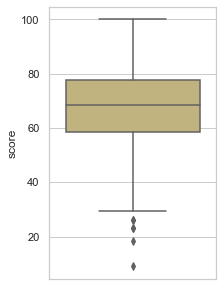

In [136]:
dfout['score'] = (dfout['math score'] + dfout['reading score'] + dfout['writing score']) / 3

plt.figure(figsize=(3, 5))
sns.boxplot(y=dfout['score'], color='y' )
plt.show()


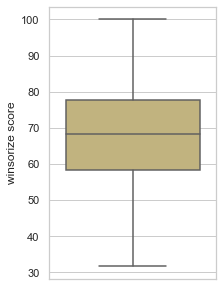

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,winsorize score,8.96301,0.01132,9.82239,0.00736


In [137]:
dfout['winsorize score'] = winsorize(dfout['score'], (0.013, 0))

plt.figure(figsize=(3, 5))
sns.boxplot(y=dfout['winsorize score'], color='y' )
plt.show()

dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
ozellik = 'winsorize score'

jb_stats = jarque_bera(dfout[ozellik])
norm_stats = normaltest(dfout[ozellik])
dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

- Testten gecemedi, normalize ettikten  sonra tekrar test uygulanir.

In [138]:
dfout["norm_score"] = normalize(np.array(dfout["winsorize score"]).reshape(1,-1)).reshape(-1,1)

normal_ozellikler=["winsorize score","norm_score"]

print('Minimum Değer\n-----------------',)
print(dfout[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(dfout[normal_ozellikler].max())

dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
ozellik = 'norm_score'

jb_stats = jarque_bera(dfout[ozellik])
norm_stats = normaltest(dfout[ozellik])
dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri


Minimum Değer
-----------------
winsorize score   31.66667
norm_score         0.01445
dtype: float64

Maksimum Değer
-----------------
winsorize score   100.00000
norm_score          0.04564
dtype: float64


,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,norm_score,8.96301,0.01132,9.82239,0.00736


- ***Aykiri degerler giderildikten sonra da yeni degisken normallestirilemedi.***